<a href="https://colab.research.google.com/github/lawish/EDA_Team_notebook/blob/main/EDA_Team_notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##1.Play store data (main dataset)
This contains data on the Google Play applications. It has 10,841 rows of data witch has following columns:

App Category: Category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

Rating: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

Reviews: number of user reviews each app has received.

Size: The memory size needed to install the application.

Installs: The number of times each application has been installed by users.

Type: Whether the app is free or a paid app.

Price: The price of the app.

Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

Last Updated: Release date of the most recent update for the app.

Current Ver: The app's current version.

Android Ver: The oldest version of Android OS supported by the app.

##2.Sentiment Analysis
This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

App : Name of the app.

Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

##**Importing Data and Modules**

In [1]:
# Importing data analysis and visualization libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading csv file
playstore_df = pd.read_csv('/content/drive/MyDrive/Almabetter/self project/capstone project/Play Store App Review Analysis/Play Store Data.csv')

In [4]:
# Printing fist five rows and all columns in dataFrame.
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
playstore_df.shape

(10841, 13)

###There are 10841 rows and 13 coulmns in our dataset

#1.Data Cleaning for playstore Data


In [6]:
# cheking data type's of features present in our dataset.
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# created copy of our dataset
playstore_df_new = playstore_df.copy()

In [8]:
# cheking for how many null values present in our DataFrame
playstore_df_new.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###From above we can see in our dataset 'Rating' coulmn has 1474 null values which is maximum as compare to other columns.

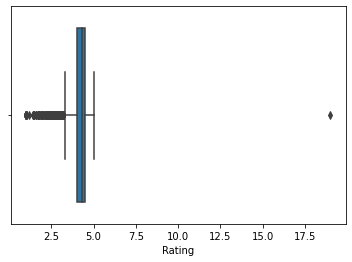

In [9]:
sns.boxplot(x=playstore_df_new['Rating'])

### From above boxplot we can see there is outlier present in 'Rating' coulmn

In [10]:
# Finding outlire present in Rating column because Rating should not to be more than 5.0
playstore_df_new[playstore_df_new.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# dropping the outlier 
playstore_df_new.drop([10472], inplace=True)

In [12]:
# Filling all null values present in 'Rating' coulmn with the median.
playstore_df_new['Rating'].fillna(playstore_df_new['Rating'].mean(),axis=0,inplace=True)

In [13]:
playstore_df_new['Rating'].isnull().sum()

0

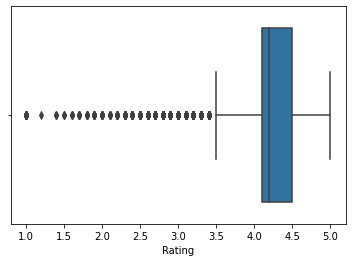

In [14]:
sns.boxplot(x=playstore_df_new['Rating'])

In [15]:
#Converted 'Reviews' data type from object which included junk to float. 
playstore_df_new['Reviews'] = pd.to_numeric(playstore_df_new['Reviews'],errors='coerce').convert_dtypes()

In [16]:
# Replacing multiple string i.e '+' and ',' present in 'Price' column.
playstore_df_new['Price'] = playstore_df_new['Price'].str.replace('$','').replace('Everyone','0.0').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [17]:
# created function to convert all MB and Kb in 'size' coulmn to int
def covert_str_(value):
  if value[-1:] == 'k':
    return float(value[:-1])*1000
  elif value[-1:] == 'M':
    return float(value[:-1])*100000
  else:
    return value[:]

In [18]:
playstore_df_new['Size'] = playstore_df_new['Size'].map(lambda x: covert_str_(x))

In [19]:
playstore_df_new['Size'] = playstore_df_new.Size.replace('Varies with device', np.NaN)

In [20]:
# null values generated in Size coulmn
playstore_df_new['Size'].isnull().sum()

1695

In [21]:
# converted object data type of Size coulmn to  numeric
playstore_df_new['Size'] = pd.to_numeric(playstore_df_new['Size'])

In [22]:
playstore_df_new.dropna(subset=['Size'], inplace=True) # dropped null values of Size coulmn

In [23]:
# removing '+' and ',' prersent in Installs coulmn
playstore_df_new['Installs']= playstore_df_new['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_df_new['Installs']= playstore_df_new['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))


In [24]:
# converted Installs coulmn data type from string to integer
playstore_df_new['Installs'] = playstore_df_new['Installs'].astype('int')

In [25]:
playstore_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(8)
memory usage: 1009.2+ KB


###**All the coulmns are converted into required Data Types**


###Dropping unwanted columns in dataFrame

In [26]:
# Dropped 'Last Updated','Current Ver','Android Ver' columns from our data Framne 
playstore_df_new.drop(['Last Updated','Current Ver','Android Ver'], axis=1, inplace=True)

In [27]:
playstore_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   Int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: Int64(1), float64(3), int64(1), object(5)
memory usage: 794.8+ KB


In [28]:
playstore_df_new.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.176624,2.490487e+05,2.165634e+06,7.114842e+06,1.184366
std,0.500668,1.716211e+06,2.247715e+06,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,5.100000e+05,1.000000e+03,0.000000
50%,4.200000,7.420000e+02,1.300000e+06,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+06,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+07,1.000000e+09,400.000000


#Data Exploration & Visualization

In [29]:
# No of application present in playstore data w.r.t category.
playstore_df_new['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [30]:
df = pd.DataFrame(playstore_df_new,columns=['Category','Rating'])

In [31]:
df

,Category,Rating
0,ART_AND_DESIGN,4.100000
1,ART_AND_DESIGN,3.900000
2,ART_AND_DESIGN,4.700000
3,ART_AND_DESIGN,4.500000
4,ART_AND_DESIGN,4.300000
...,...,...
10835,BUSINESS,4.191757
10836,FAMILY,4.500000
10837,FAMILY,5.000000
10838,MEDICAL,4.191757


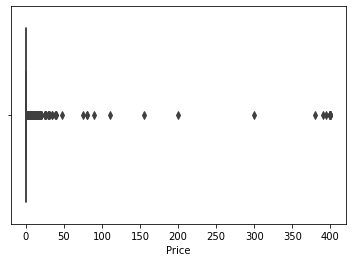

In [32]:
sns.boxplot(x=playstore_df_new['Price'])

##**From above boxplot we can see that there are very few aaps which are having price more than $50.**
##**So we are dropping them as they are treated as outlier at the time of visualization.**

In [33]:
df = playstore_df_new.copy()

In [34]:
df.drop(df[df['Price']>=50].index,inplace=True)

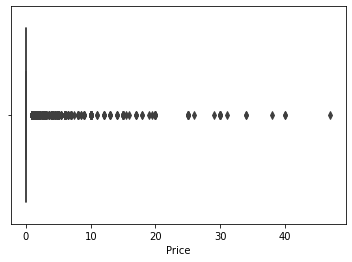

In [35]:
sns.boxplot(x=df['Price'])

In [36]:
playstore_df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.078858,0.076992,0.051733,-0.019535
Reviews,0.078858,1.000000,0.238513,0.627720,-0.009839
Size,0.076992,0.238513,1.000000,0.164698,-0.022337
Installs,0.051733,0.627720,0.164698,1.000000,-0.010481
Price,-0.019535,-0.009839,-0.022337,-0.010481,1.000000


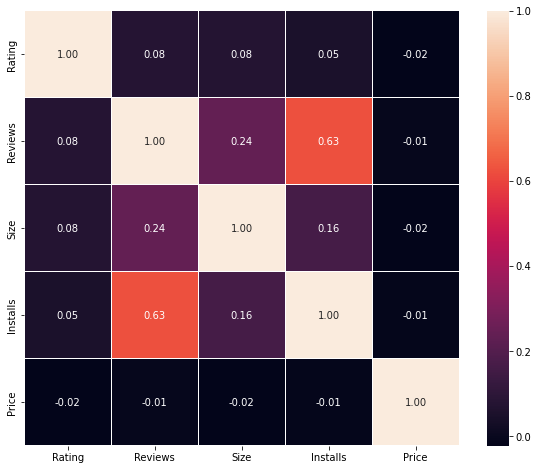

In [37]:
# Heatmap for cheking correlation between columns in Playstore DataFrame. 
fig, axes =plt.subplots(figsize=(10, 8))
sns.heatmap(playstore_df_new.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

###**Number of Reviews  is highly correlated with the number of Installs of the application**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


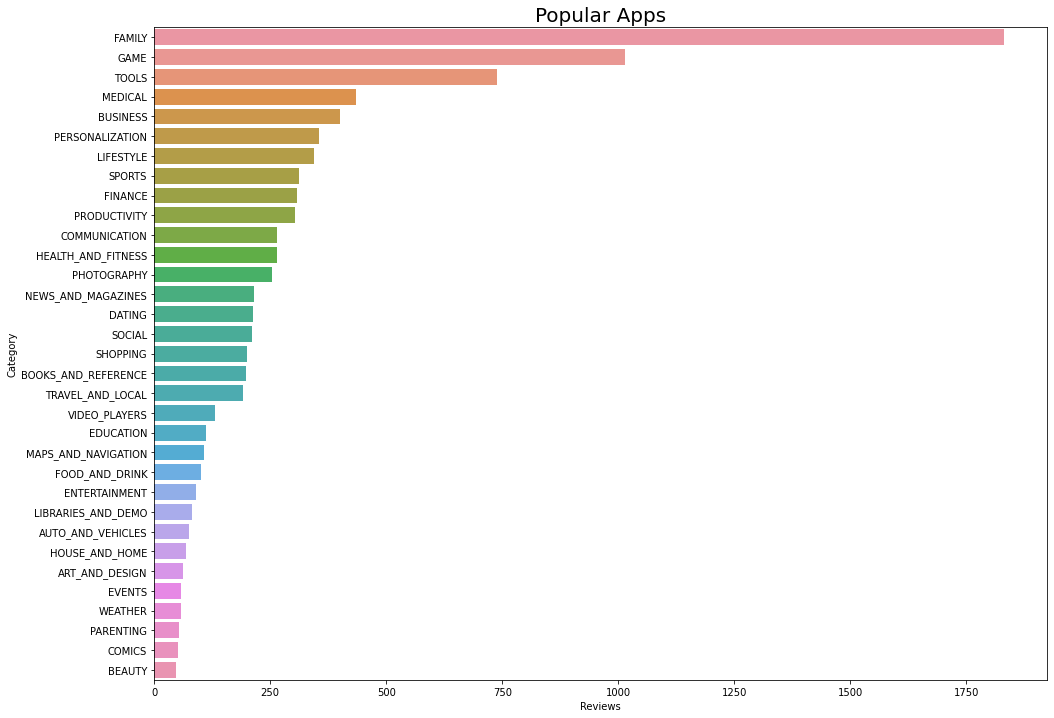

In [38]:
# Plotting Barplot for visualize apps reviews w.r.t Category.
apps_category = playstore_df_new.Category.value_counts();
plt.figure(figsize=(16, 12));
sns.barplot(apps_category, apps_category.index);
plt.ylabel('Category');
plt.xlabel('Reviews');
plt.title('Popular Apps', Size = 20);
plt.show();

####**So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under Family & Game category getting most number of reviews and very least reviews least for Beauty & Comics Category.**